# problem statement

The objective of the starbucks dataset is to predict proteins.The dataset of several predictors(independent)variables 
and one target variable(proteins)

# dataset information:

1.item: Food item.
    
2.calories: Calories 
    
3.fat: a numeric vector
    
4.carb: a numeric vector
    
5.fiber: a numeric vector
    
6.protein: a numeric vector
    
7.type: a factor with levels bakery, bistro box, hot breakfast, parfait, petite, salad, and sandwich

# step 1: Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

# Step 2: Load the Dataset

In [3]:
df = pd.read_csv('starbucks.csv')


# Step 3: Exploratory Data Analysis

# understanding Variables

       1)Head of the dataset
       2)The shape of the dataset
       3)List types of all columns
       4)Info of the dataset
       5)Summary of the dataset

# Head of the Dataset
    
The head() function will tell you the top records in the dataset. By default, python shows you only the top 5 records

In [4]:
df.head()              # Display first five records of data

,Unnamed: 0,item,calories,fat,carb,fiber,protein,type
0,1,8-Grain Roll,350,8.0,67,5,10,bakery
1,2,Apple Bran Muffin,350,9.0,64,7,6,bakery
2,3,Apple Fritter,420,20.0,59,0,5,bakery
3,4,Banana Nut Loaf,490,19.0,75,4,7,bakery
4,5,Birthday Cake Mini Doughnut,130,6.0,17,0,0,bakery


In [5]:
df.tail()              # Display last five records of data

,Unnamed: 0,item,calories,fat,carb,fiber,protein,type
72,73,Tarragon Chicken Salad Sandwich,420,13.0,46,6,32,sandwich
73,74,Turkey & Swiss Sandwich,390,13.0,36,2,34,sandwich
74,75,Greek Yogurt Honey Parfait,300,12.0,44,0,8,parfait
75,76,Peach Raspberry Yogurt Parfait,300,4.0,57,3,10,parfait
76,77,Strawberry & Blueberry Yogurt Parfait,300,3.5,60,3,7,parfait


# The Shape of the dataset

This shape() function gives us the number of rows and columns of the dataset.

In [6]:
df.shape           # it display number of rows and columns

(77, 8)

In [7]:
#List types of all columns
df.columns

Index(['Unnamed: 0', 'item', 'calories', 'fat', 'carb', 'fiber', 'protein',
       'type'],
      dtype='object')

# List types of all columns

Using df.dtypes, we get the list of types of all the columns in our dataset.

In [8]:
df.dtypes

Unnamed: 0      int64
item           object
calories        int64
fat           float64
carb            int64
fiber           int64
protein         int64
type           object
dtype: object

# Info of the dataset
    
info() is used to check the information about the data and the datatypes of each respective attribute and also gives you the count.

In [9]:
# Finding out if the dataset contains any null value 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  77 non-null     int64  
 1   item        77 non-null     object 
 2   calories    77 non-null     int64  
 3   fat         77 non-null     float64
 4   carb        77 non-null     int64  
 5   fiber       77 non-null     int64  
 6   protein     77 non-null     int64  
 7   type        77 non-null     object 
dtypes: float64(1), int64(5), object(2)
memory usage: 4.9+ KB


# Summary of the dataset
The described method will help to see how data has been spread for numerical values. We can clearly see the minimum value, mean values, different percentile values and maximum values.

In [10]:
# Statistical summary
df.describe()

,Unnamed: 0,calories,fat,carb,fiber,protein
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,39.000000,338.831169,13.766234,44.870130,2.220779,9.480519
std,22.371857,105.368701,7.095488,16.551634,2.112764,8.079556
min,1.000000,80.000000,0.000000,16.000000,0.000000,0.000000
25%,20.000000,300.000000,9.000000,31.000000,0.000000,5.000000
50%,39.000000,350.000000,13.000000,45.000000,2.000000,7.000000
75%,58.000000,420.000000,18.000000,59.000000,4.000000,15.000000
max,77.000000,500.000000,28.000000,80.000000,7.000000,34.000000


# Numerical Features

In [11]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [12]:
df.dtypes[df.dtypes!='object'].index

Index(['calories', 'fat', 'carb', 'fiber', 'protein'], dtype='object')

In [13]:
[features  for features in df.dtypes[df.dtypes!='object'].index]

['calories', 'fat', 'carb', 'fiber', 'protein']

In [14]:
num_features = df.dtypes[df.dtypes!='object'].index
num_features

Index(['calories', 'fat', 'carb', 'fiber', 'protein'], dtype='object')

In [15]:
# No of Numerical Features
len(num_features)

5

In [16]:
# Summarize numerical features
df[num_features].describe()

,calories,fat,carb,fiber,protein
count,77.000000,77.000000,77.000000,77.000000,77.000000
mean,338.831169,13.766234,44.870130,2.220779,9.480519
std,105.368701,7.095488,16.551634,2.112764,8.079556
min,80.000000,0.000000,16.000000,0.000000,0.000000
25%,300.000000,9.000000,31.000000,0.000000,5.000000
50%,350.000000,13.000000,45.000000,2.000000,7.000000
75%,420.000000,18.000000,59.000000,4.000000,15.000000
max,500.000000,28.000000,80.000000,7.000000,34.000000


# Distribution of Categorical Features

In [17]:
cat_features = df.dtypes[df.dtypes == 'object'].index
cat_features

Index(['item', 'type'], dtype='object')

In [18]:
len(cat_features)

2

In [19]:
df[cat_features].describe()             # i dont have unique values CV

,item,type
count,77,77
unique,77,7
top,8-Grain Roll,bakery
freq,1,41


# Data Cleaning

# Check the Null Values

Using .isnull.sum() function we can see the null values present in the every column in the dataset.

In [20]:
df.isnull().sum()

item        0
calories    0
fat         0
carb        0
fiber       0
protein     0
type        0
dtype: int64

# Drop the Duplicates

check is there any duplicates rows are exist then we should remove from the dataframe.

In [21]:
df.duplicated().sum()

0

In [22]:
df.shape

(77, 7)

In [23]:
# or you can run this through for loop

for i in df.columns:
    print("FEATURE NAME=",i)
    print(df[i].unique(),'\n')
    print(i,'------->',df[i].nunique(),'\n')

FEATURE NAME= item
['8-Grain Roll' 'Apple Bran Muffin' 'Apple Fritter' 'Banana Nut Loaf'
 'Birthday Cake Mini Doughnut' 'Blueberry Oat Bar' 'Blueberry Scone'
 'Bountiful Blueberry Muffin' 'Butter Croissant ' 'Cheese Danish'
 'Chocolate Chunk Cookie' 'Chocolate Cinnamon Bread' 'Chocolate Croissant'
 'Chocolate Old-Fashioned Doughnut' 'Chonga Bagel' 'Cinnamon Chip Scone'
 'Cranberry Orange Scone' 'Double Chocolate Brownie'
 'Double Fudge Mini Doughnut' 'Everything with Cheese Bagel'
 'Ginger Molasses Cookie' 'Iced Lemon Pound Cake' 'Mallorca Sweet Bread'
 'Maple Oat Pecan Scone ' 'Marble Pound Cake' 'Marshmallow Dream Bar'
 'Morning Bun' 'Multigrain Bagel' 'Old-Fashioned Glazed Doughnut'
 'Outrageous Oatmeal Cookie' 'Petite Vanilla Bean Scone' 'Plain Bagel'
 'Pumpkin Bread' 'Pumpkin Scone ' 'Raspberry Scone'
 'Raspberry Swirl Pound Cake'
 'Reduced-Fat Banana Chocolate Chip Coffee Cake'
 'Reduced-Fat Cinnamon Swirl Coffee Cake'
 'Reduced-Fat Very Berry Coffee Cake ' 'Starbucks Classic Cof

# Data Visualization

1. Histograms

Histograms are one of the most common graphs used to display numeric data.
distribution of the data --- whether the data is normally distributed or if it's skewed (to the left or right)

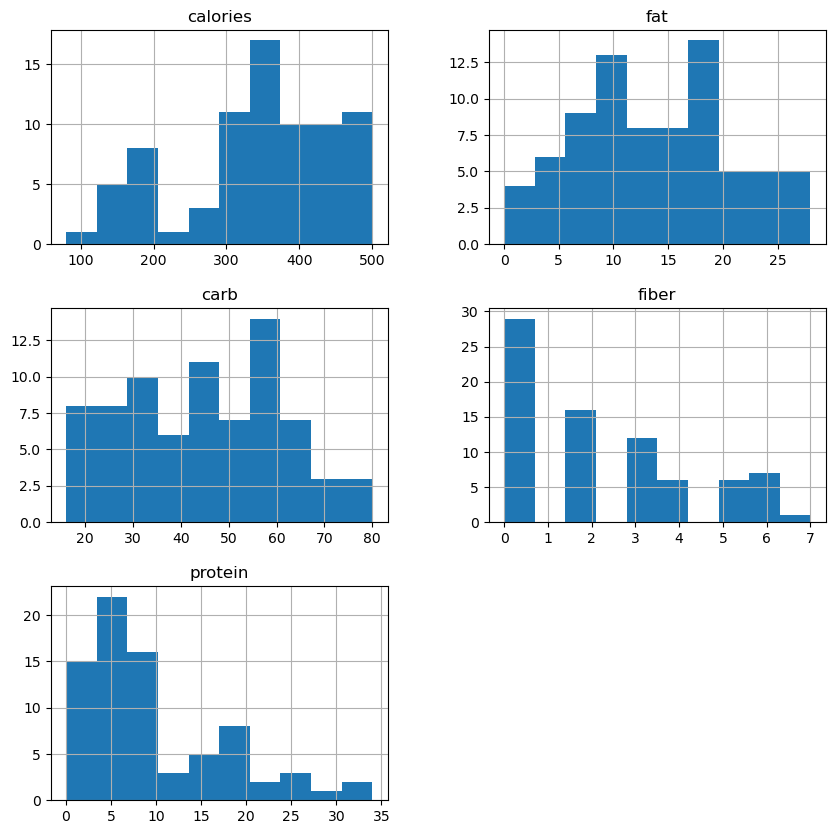

In [24]:
df.hist(bins=10,figsize=(10,10))
plt.show()

<Axes: xlabel='calories', ylabel='Density'>

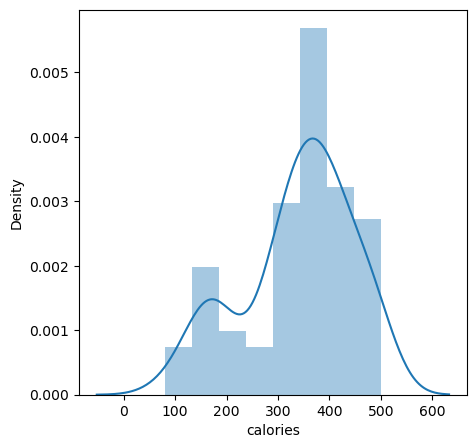

In [25]:
plt.figure(figsize=(5,5))    
sns.distplot(df['calories'])

# Will use Log Transformation for charges to convert right skewed into normal distribution

<Axes: xlabel='carb', ylabel='Density'>

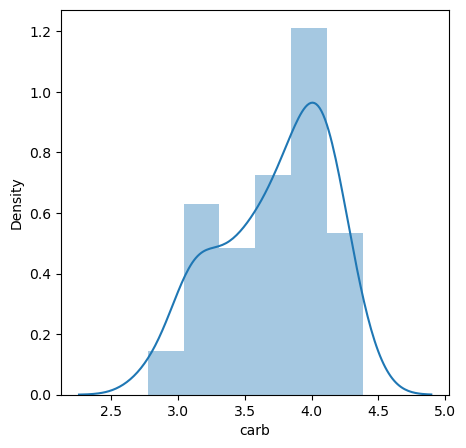

In [26]:
plt.figure(figsize=(5,5))    
sns.distplot(np.log(df['carb']))

In [27]:
new_df=df.copy()

In [28]:
new_df['carb']=np.log(df['carb'])

In [29]:
new_df.shape

(77, 7)

In [30]:
new_df.head()

,item,calories,fat,carb,fiber,protein,type
0,8-Grain Roll,350,8.0,4.204693,5,10,bakery
1,Apple Bran Muffin,350,9.0,4.158883,7,6,bakery
2,Apple Fritter,420,20.0,4.077537,0,5,bakery
3,Banana Nut Loaf,490,19.0,4.317488,4,7,bakery
4,Birthday Cake Mini Doughnut,130,6.0,2.833213,0,0,bakery


# Scatter plot

A Scatterplot is a type of graph which 'plots' the values along two axes, like age and height. Scatterplots are useful for many reasons. like correlation matrices, It allows you to quickly understand a relationship between two variables.

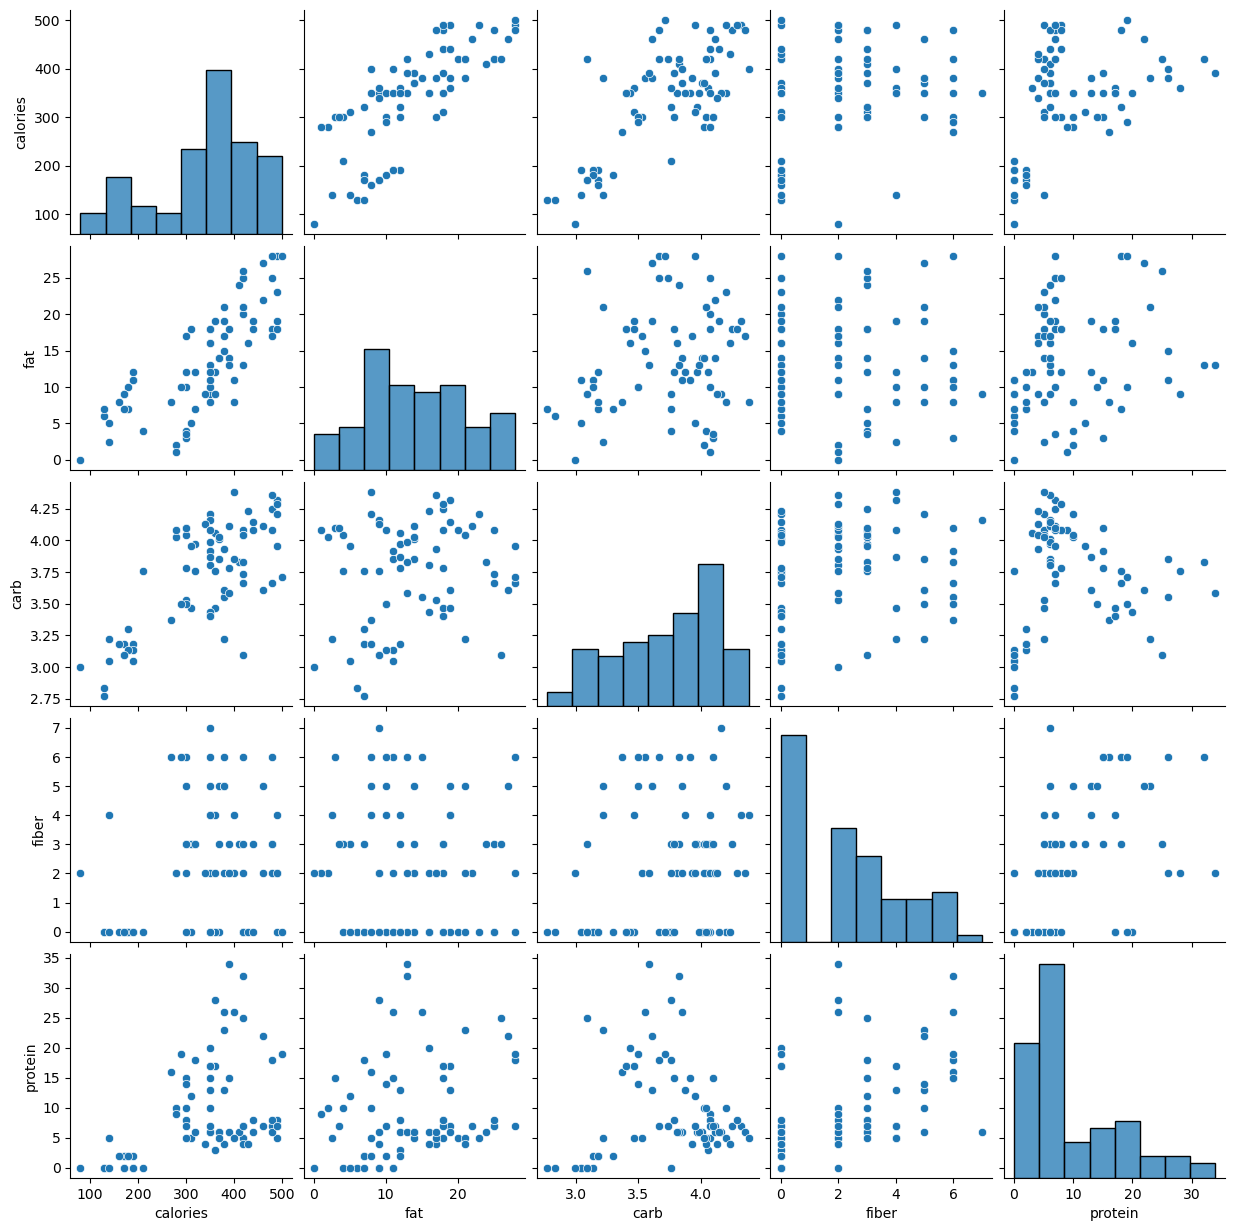

In [31]:
sns.pairplot(new_df)

# distribution of starbacks types

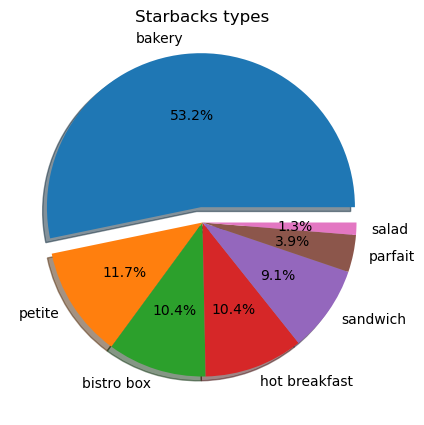

In [32]:
type = df['type'].value_counts()
plt.figure(figsize=(5, 5))
plt.title('Starbacks types')
plt.pie(data=df, x=type.values, labels=type.index, autopct='%1.1f%%', explode=(0.1, 0, 0, 0, 0, 0, 0), shadow=True)
plt.show()



# baked goods are a big part of the Starbucks menu.

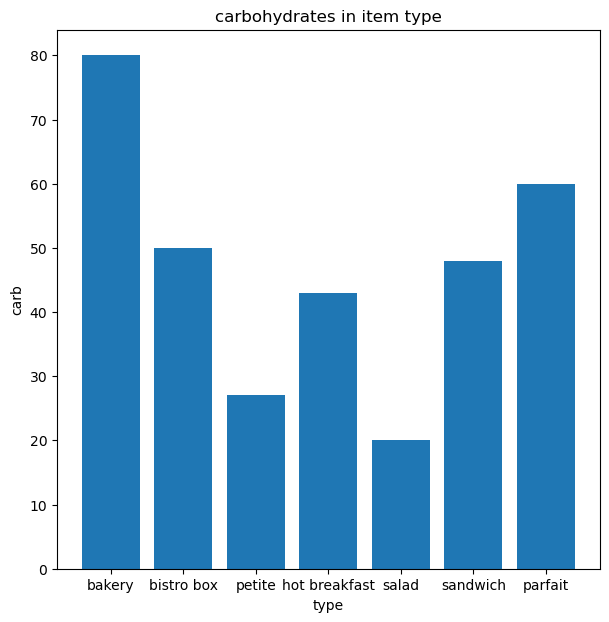

In [33]:
plt.figure(figsize=(7,7))                          #carbohydrates rich food in bakery
plt.bar('type','carb',data=df)
plt.xlabel('type')                                   #dairy products like milk and yogurt
plt.ylabel('carb')
plt.title('carbohydrates in item type')
plt.show()

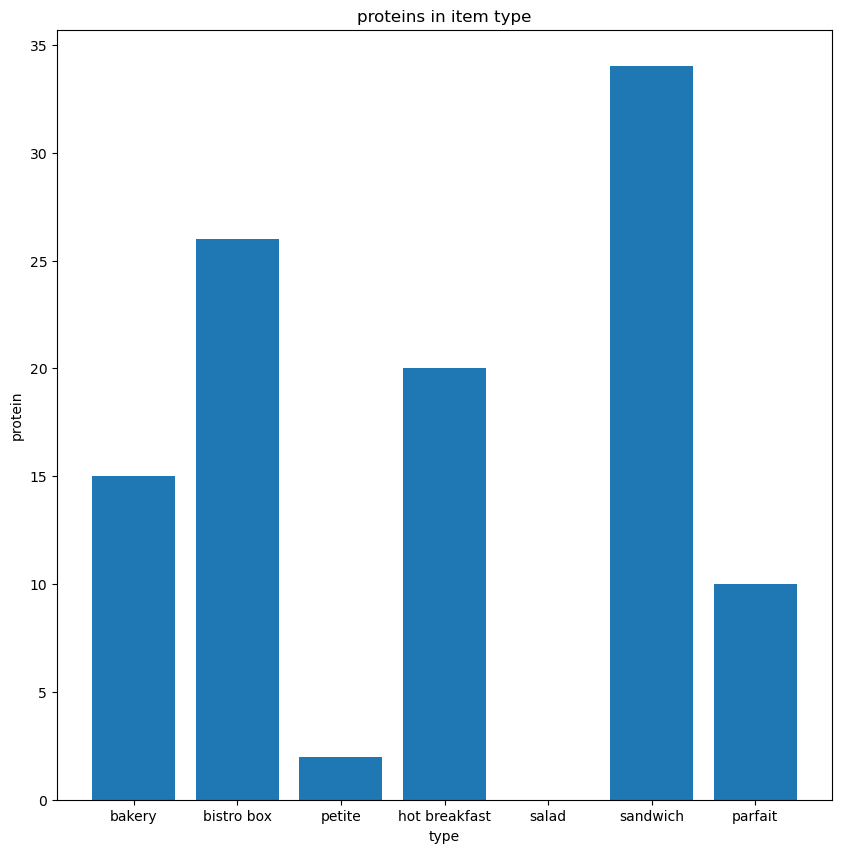

In [34]:
plt.figure(figsize=(10,10))                  #sandwich having a more proteins
plt.bar('type','protein', data=df)             # proteins like chicken,chickrn with spread,ham and cheese 
plt.xlabel('type')                            # veggies for crunch and flavor
plt.ylabel('protein')
plt.title('proteins in item type')
plt.show()

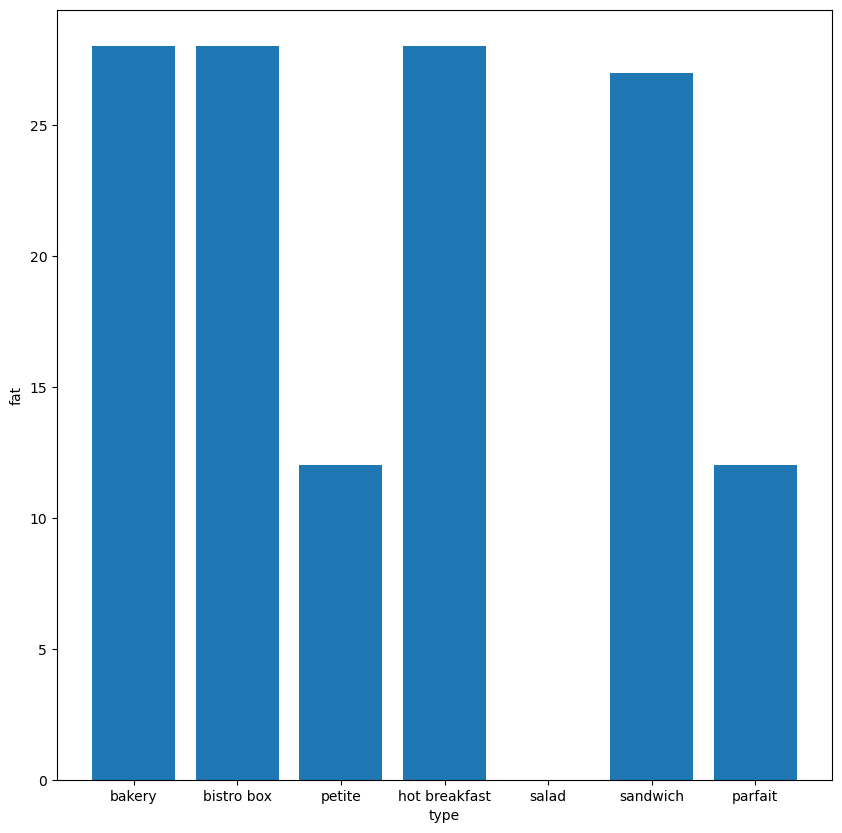

In [35]:
plt.figure(figsize=(10,10))                   #fats like oils derived from animals(butter,lard and tallow)
plt.bar('type','fat',data=df)                 #plant source fats like (peanut,coconut,sesame,rice bran,soy,sunflower,cottonseed)
plt.xlabel('type')                     #bistro box(protein box) they usually include,healthy protein(boiled egg,nut butters,cream,cheese)
plt.ylabel('fat')                  #hotbreakfast (egg yolks,oliveoil,coconut oil,butter,ghee,avacado)
plt.show()                         

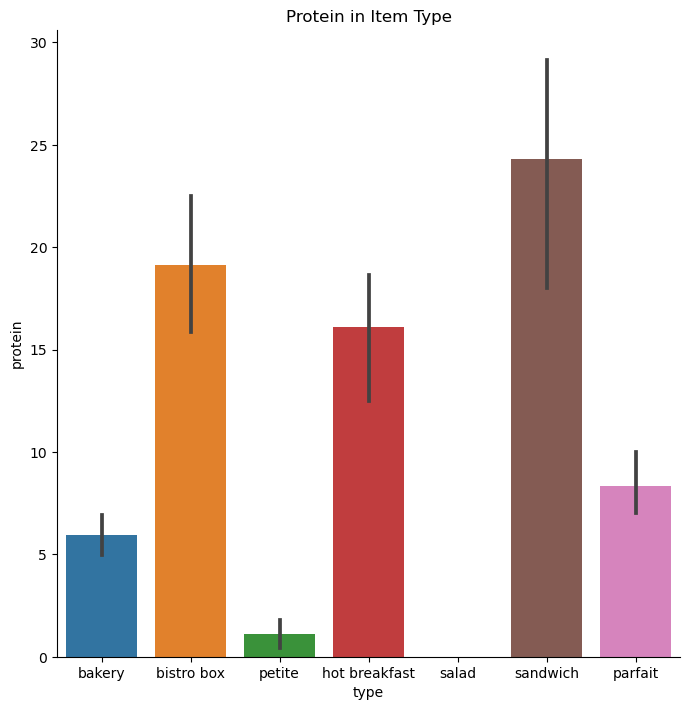

In [36]:
sns.catplot(data=df, x='type', y='protein', kind='bar', height=7).set(title='Protein in Item Type')
plt.show()


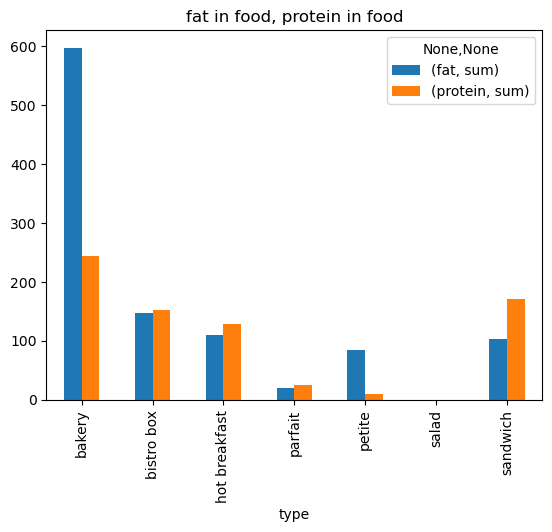

In [37]:
df.groupby('type')['fat','protein'].agg(['sum']).plot.bar()
plt.title('fat in food, protein in food')
plt.rcParams['figure.figsize']= [50,50]
plt.show()

bakery           41
petite            9
bistro box        8
hot breakfast     8
sandwich          7
parfait           3
salad             1
Name: type, dtype: int64


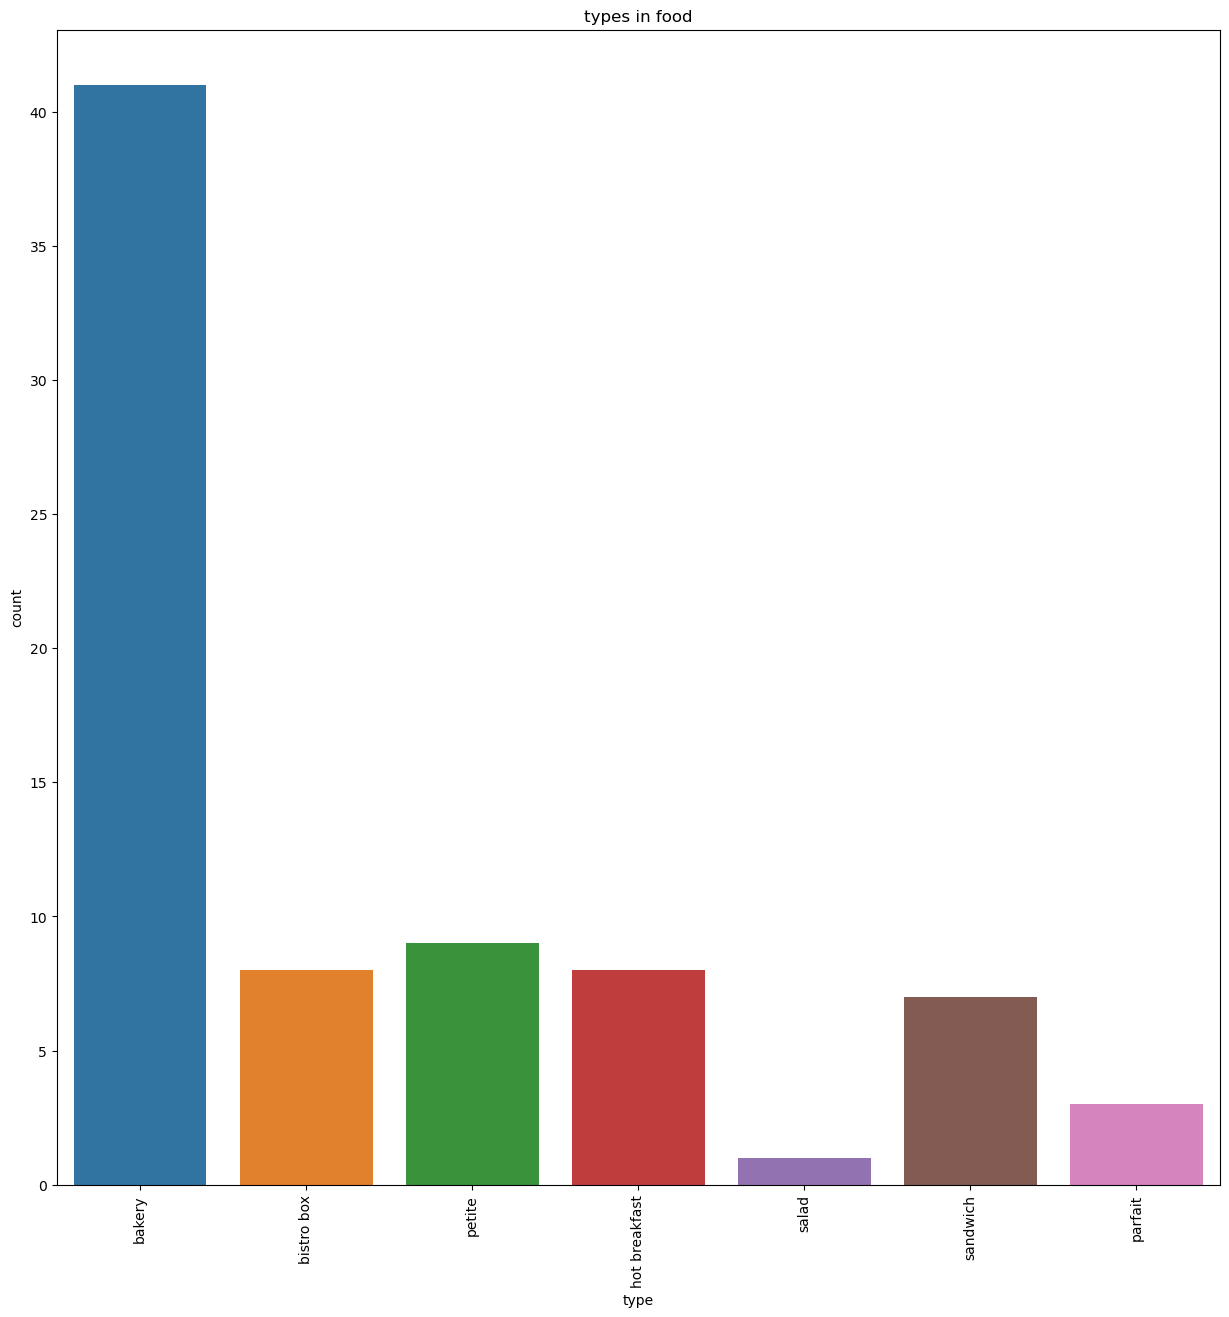

In [38]:
print(df['type'].value_counts())
plt.figure(figsize=(15,15))
sns.countplot(x=df['type'])
plt.title('types in food')
plt.xticks(rotation=90)
plt.show()

18.0    7
9.0     5
12.0    5
8.0     4
10.0    4
19.0    4
14.0    4
7.0     4
11.0    4
16.0    3
13.0    3
21.0    3
17.0    3
25.0    3
28.0    3
5.0     2
4.0     2
2.5     1
26.0    1
0.0     1
27.0    1
15.0    1
2.0     1
1.0     1
3.0     1
23.0    1
24.0    1
22.0    1
6.0     1
20.0    1
3.5     1
Name: fat, dtype: int64


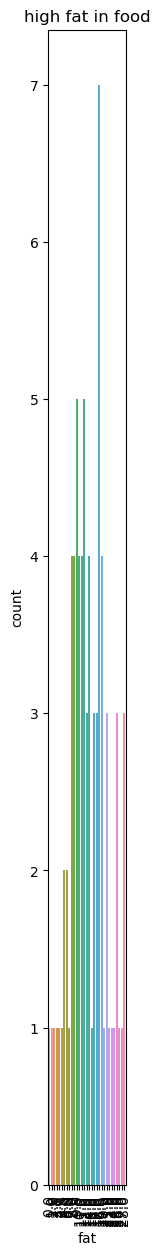

In [39]:
print(df['fat'].value_counts())
plt.figure(figsize=(1,15))
sns.countplot(x=df['fat'])
plt.title('high fat in food')
plt.xticks(rotation=90)
plt.show()

In [40]:
df.drop(columns='item',axis=1,inplace=True)

In [41]:
df

,calories,fat,carb,fiber,protein,type
0,350,8.0,67,5,10,bakery
1,350,9.0,64,7,6,bakery
2,420,20.0,59,0,5,bakery
3,490,19.0,75,4,7,bakery
4,130,6.0,17,0,0,bakery
...,...,...,...,...,...,...
72,420,13.0,46,6,32,sandwich
73,390,13.0,36,2,34,sandwich
74,300,12.0,44,0,8,parfait
75,300,4.0,57,3,10,parfait


# To solve a regression problem, which involves predicting a continuous numerical value, you can follow these general steps:
    
1.Understand the problem.

2.Collect and preprocess the data.

3.Feature engineering.

4.Split the data.

5.Select a regression algorithm.

6.Train the regression model.

7.Evaluate the model.

8.Fine-tune the mode.

9.Make predictions.

10.Monitor and update.

understanding the problem ,collection and preprocessing the data is already observed

# Feature engineering.

In [47]:
df3=df.copy()

In [48]:
df3=pd.get_dummies(df3,drop_first=True)

In [49]:
df3.shape

(77, 11)

In [50]:
df3

,calories,fat,carb,fiber,protein,type_bistro box,type_hot breakfast,type_parfait,type_petite,type_salad,type_sandwich
0,350,8.0,67,5,10,0,0,0,0,0,0
1,350,9.0,64,7,6,0,0,0,0,0,0
2,420,20.0,59,0,5,0,0,0,0,0,0
3,490,19.0,75,4,7,0,0,0,0,0,0
4,130,6.0,17,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
72,420,13.0,46,6,32,0,0,0,0,0,1
73,390,13.0,36,2,34,0,0,0,0,0,1
74,300,12.0,44,0,8,0,0,1,0,0,0
75,300,4.0,57,3,10,0,0,1,0,0,0


# 5) Split the dataframe into X & y

In [51]:
# Separate object for target feature 
y = df3['protein']

# Separate object for Predictors 
X = df3.drop('protein',axis=1)

In [52]:
X.head()


,calories,fat,carb,fiber,type_bistro box,type_hot breakfast,type_parfait,type_petite,type_salad,type_sandwich
0,350,8.0,67,5,0,0,0,0,0,0
1,350,9.0,64,7,0,0,0,0,0,0
2,420,20.0,59,0,0,0,0,0,0,0
3,490,19.0,75,4,0,0,0,0,0,0
4,130,6.0,17,0,0,0,0,0,0,0


In [53]:
y.head()

0    10
1     6
2     5
3     7
4     0
Name: protein, dtype: int64

In [54]:
print('X Shape =',X.shape,'\ny Shape =',y.shape)

X Shape = (77, 10) 
y Shape = (77,)


# 6) Train Test Split

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [56]:
X_train.shape,y_train.shape

((61, 10), (61,))

In [57]:
y_train.shape,y_test.shape

((61,), (16,))

# Build the Regression Algorithm

In [58]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

# Evaluation Metrics

In [59]:
# Train Score

train_score = lr.score(X_train,y_train)
print('Train Score = ',train_score)

Train Score =  0.9481433654854409


In [60]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)
print('R2 Score =',score)

R2 Score = 0.7740229945378124


In [61]:
from sklearn import metrics
print('Mean Absolute Error =',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error =',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error =',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error = 2.2169947940983605
Mean Squared Error = 8.2446298086595
Root Mean Squared Error = 2.871346340771085


# Conclusion

The analysis of the Starbucks nutritional information dataset provides valuable 
insights into the calorie content, nutrient profiles, correlations, 
average nutrient content by food item type, composition trends, outliers, 
and food items with balanced macronutrients. These findings can guide individuals 
in making informed choices about their dietary preferences and nutritional goals.